In [1418]:
# library & dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")
# Import label encoder 
from sklearn import preprocessing

#Load the Excel data into a DataFrame object
data = pd.ExcelFile('V02Max_Combined.xlsx')
data_merged = pd.read_excel('merged_athletes_data.xlsx')
data_criteria=pd.ExcelFile('crieteria_data.xlsx')

data_Kayaking = pd.read_excel(data, sheet_name = 'Kayaking')
data_Athletes = pd.read_excel(data, sheet_name ='Athletes')
data_Triathlon = pd.read_excel(data, sheet_name ='Triathlon')
data_Fencing = pd.read_excel(data, sheet_name ='Fencing')
data_Criteria = pd.read_excel(data_criteria,sheet_name = 'Sheet1')

#global variables
#-----------------------
#grouping the data and calculating VO2Sum for each athlete
df = data_merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2_Sum')

#merging the data to fetch the weight of each athlete
df1 = pd.merge(df, data_Athletes[['ID','age','Weight','Height','sport','First Name','Last Name']], on='ID', how='inner')

#calculating VO2Max
df1['VO2Max'] = df1['VO2_Sum']/df1['Weight']
print(df1.head())
#------------------------------

   ID      VO2_Sum  age  Weight  Height    sport First Name Last Name  \
0   1  2298.775092   15    53.7     161  fencing     Olivia  Martinez   
1   2  2171.152256   15    56.2     162  fencing      Ethan  Reynolds   
2   3  6266.538536   16    89.9     191  fencing    Jackson    Harper   
3   4  5889.725663   16    76.5     180  fencing       Liam   Sanchez   
4   5  6627.133058   17    76.4     186  fencing        Ava  Thompson   

      VO2Max  
0  42.807730  
1  38.632602  
2  69.705657  
3  76.989878  
4  86.742579  


**42. What was the difference in heart rate between warm up and GET for athlete 1**

In [1393]:
# Step 2 Calculate heart rate from HR for the creiteria dataset
data_Criteria['HR'] = 60 / (data_Criteria['RR'] / 1000)
#print(sheet_criteria.head())

HR_warm_up_data = data_Criteria[data_Criteria['phase']=='Warm Up']
HR_GET_data = data_Criteria[data_Criteria['phase']=='GET']
print(HR_warm_up_data)


# Calculate the average HR for phase - warmup & GET
average_HR_warm_up = HR_warm_up_data['HR'].mean()
average_HR_GET = HR_GET_data['HR'].mean()
#print("average HR GET",average_HR_GET)
#print("average HR warmup",average_HR_warm_up)

#Find the average % difference in HR
HR_differnce = ((average_HR_GET - average_HR_warm_up)/average_HR_warm_up )*100
print(f"The heart rate during a GET could be {percentage_differnce:0.2f} % higher than during the warm-up.")

       ID     time     RR       VO2  power    phase         HR
0      11 -168.600  727.0  0.287147      0  Warm Up  82.530949
1      11 -167.872  728.0  0.287147      0  Warm Up  82.417582
2      11 -167.148  724.0  0.287147      0  Warm Up  82.872928
3      11 -166.484  664.0  0.320580      0  Warm Up  90.361446
4      11 -165.836  648.0  0.320580      0  Warm Up  92.592593
...    ..      ...    ...       ...    ...      ...        ...
49658  10   -3.452  716.0  0.300803      0  Warm Up  83.798883
49659  10   -2.712  740.0  0.291465      0  Warm Up  81.081081
49660  10   -2.032  680.0  0.291465      0  Warm Up  88.235294
49661  10   -1.348  684.0  0.291465      0  Warm Up  87.719298
49662  10   -0.664  684.0  0.308664      0  Warm Up  87.719298

[4241 rows x 7 columns]
The heart rate during a GET could be 87.86 % higher than during the warm-up.


**43. Create a pivot table that shows count of patients within each age group and sport**

In [1396]:
# Create a pivot table Using Aggfunc 'count'
pivot_table = pd.pivot_table(data_Athletes, values='ID', index='sport', columns='age', aggfunc='count')
pivot_table.style.format({'ID':'{:.0f}'}) 
print(pivot_table)

age         12   13   14   15   16   17   18
sport                                       
fencing    NaN  NaN  2.0  4.0  2.0  2.0  NaN
kayak      NaN  2.0  NaN  NaN  1.0  NaN  3.0
triathlon  2.0  NaN  NaN  NaN  NaN  NaN  NaN


**44. Display a  distrubution chart of MAX V02 for all athletes**

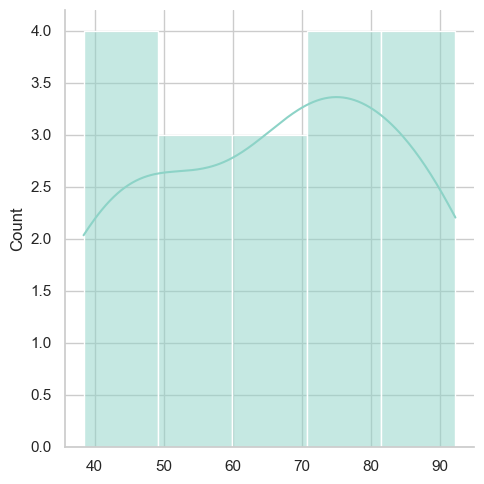

In [1399]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.displot(lst_VO2_max,kde=True,bins=5)


**45. Create a dummy array with no data with a size of 15.**

In [1406]:
dumArr = np.array(15)
print(F"Array created without data with size {dumArr}")

Array created without data with size 15


**46. How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?**

**47. Convert ' sport' into a numeric field through Label encoding**

In [1419]:
#print("sport column ",data_Athletes['sport'].unique())
print("sport Column :\n",data_Athletes['sport'])
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'sport'. 
data_Athletes['sport']= label_encoder.fit_transform(data_Athletes['sport']) 
#sheet_Athletes['sport'].unique() 
print("conversion into numeric",data_Athletes['sport'].unique())
print("sport data\n",data_Athletes['sport'])

sport Column :
 0       fencing
1       fencing
2       fencing
3       fencing
4       fencing
5       fencing
6       fencing
7       fencing
8       fencing
9       fencing
10        kayak
11        kayak
12        kayak
13        kayak
14        kayak
15        kayak
16    triathlon
17    triathlon
Name: sport, dtype: object
conversion into numeric [0 1 2]
sport data
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    2
Name: sport, dtype: int64


**48. What was the average age of the athletes?**

In [1423]:
print(f"average age of the athletes is {data_Athletes['age'].mean():.2f} years")

average age of the athletes is 15.22 years


**49. Retrieve the row with minimum IBI for fencing athletes using sorting technique.**

In [1426]:
# Calculate the IBI (RR interval) 

# Sorting by column 'RR'
# by putting missing values first
data_Fencing.sort_values(by=['RR'], na_position='first')

#get minimum IBI
minValueIndex = data_Fencing['RR'].idxmin()

#return entire row of players with the min points
print(f"Minimun value of IBI {data_Fencing['RR'].iloc[minValueIndex]} and its corresponding row values:\n {data_Fencing.iloc[minValueIndex]}")



Minimun value of IBI 252 and its corresponding row values:
 ID         7.000000
time     596.372000
RR       252.000000
VO2        1.293014
power    155.000000
Name: 19582, dtype: float64


**50. Create a violin chart using any 2 columns in the dataset**

<Axes: xlabel='ID', ylabel='power'>

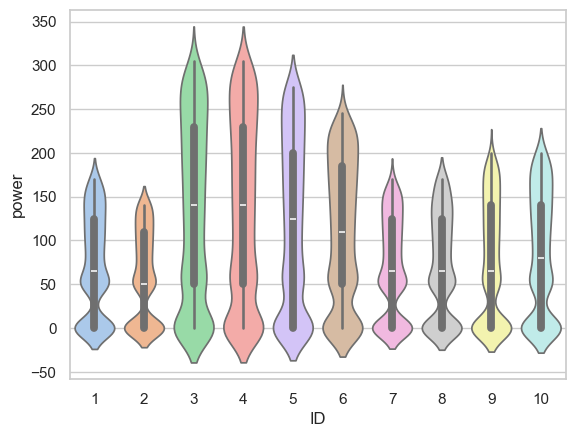

In [1436]:
# use to set style of background of plot
sns.set(style = 'whitegrid')
df = data_Fencing[['ID','power']]
sns.violinplot(data = df, x= 'ID',y= 'power' ,palette="pastel")

**51. List every athlete’s V02 ml/kg**

In [1439]:
lst_VO2_max = df1['VO2Max'].tolist()
print("list of VO2max\n")

for id in lst_VO2_max:
    print(f"{id:.2f} (ml/kg) ")

list of VO2max

42.81 (ml/kg) 
38.63 (ml/kg) 
69.71 (ml/kg) 
76.99 (ml/kg) 
86.74 (ml/kg) 
71.68 (ml/kg) 
38.40 (ml/kg) 
44.82 (ml/kg) 
49.70 (ml/kg) 
55.12 (ml/kg) 
89.59 (ml/kg) 
92.26 (ml/kg) 
90.76 (ml/kg) 
54.87 (ml/kg) 
66.94 (ml/kg) 
69.66 (ml/kg) 
73.79 (ml/kg) 
81.21 (ml/kg) 


**53. phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill**

In [1442]:
phonebook ={ 
    "john" :938477566,
    "Jack":938377264,
    "Jill":947662781
}
print("The phone no of Jill is :",phonebook["Jill"])

The phone no of Jill is : 947662781


**54. Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID**

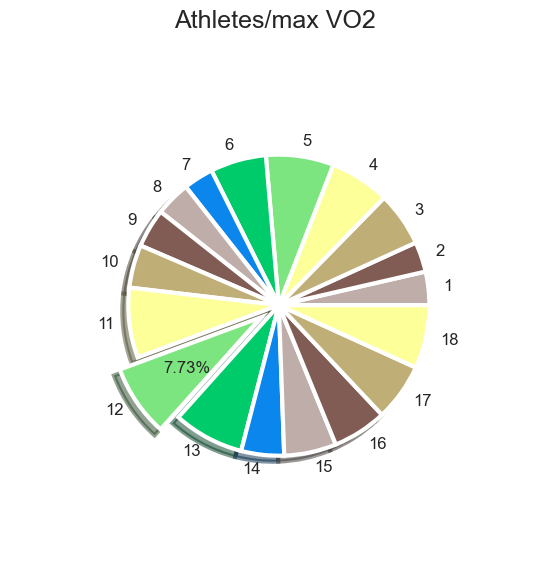

In [1445]:
id = df1['ID'].iloc[df1['VO2Max'].idxmax()]
#print("heighest VO2max",id)
fig, ax = plt.subplots(figsize=(6, 6))
explode = (0,  0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0,0)   
patches, texts, autotexts = plt.pie(x=df1['VO2Max'],explode = explode ,
        labels= df1['ID'], 
        radius=.7,
        frame=False,
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        colors= sns.color_palette("terrain_r", 7),
       textprops={'size': 12},
       shadow = True,
      autopct='%1.2f%%'
       )
ax.set_title('Athletes/max VO2 ', fontsize=18)
plt.tight_layout()
#patches, texts, autotexts = plt.pie(x=df1['VO2Max'], labels=df1['ID'],explode = explode ,shadow = True,autopct='%1.2f%%',)
# Iterate over slices
for idx, wedge in enumerate(patches): 
    # Hide all slices except the highest VO2max
    if (idx != 11):
        #wedge.set_visible(False)
        #texts[idx].set_visible(False)
        autotexts[idx].set_visible(False)
      

plt.pie(count, 
        labels=labels_sport,
        labeldistance=1.1,
        autopct=lambda x: '{:.0f}'.format(x * (data_Athletes['sport'].count()) / 100),
        textprops={'fontsize':10},
        colors=sns.color_palette('Set2'),
        startangle=90)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()

**55. Using a for loop iterate through HR for all triathlon and display all details of the athlete with the highest heart rate**

In [1452]:
# Create an empty list to store HR data
HR_list =[]

#reading RR column from Triathlon dataframe
list = data_Triathlon.iloc[:] 

# Converting DataFrame to list using values property
RR_list = list['RR'].tolist()

# printing original list
#print("The original list is : \n"+ str(RR_list))

# Iterate over column RR
for i in RR_list:
    
    #R-R Interval Heart Rate Formula (HR=60/RR/1000) unit BPM
   temp_list=60/(i/1000) 
   HR_list.append(temp_list)
    
# Max value in HR list
print(f"The highest heart rate value is: {max(HR_list):.2f}")

id = HR_list.index(max(HR_list))

#This will return the entire row of max value HR index
print ("Triathlon_data[{}]: \n".format(id), list.iloc[id])



The highest heart rate value is: 197.37
Triathlon_data[4152]: 
 ID        18.000000
time     628.644000
RR       304.000000
VO2        1.909147
power    170.000000
Name: 4152, dtype: float64


**56. Display a histogram to show distribution of athletes by sport.**

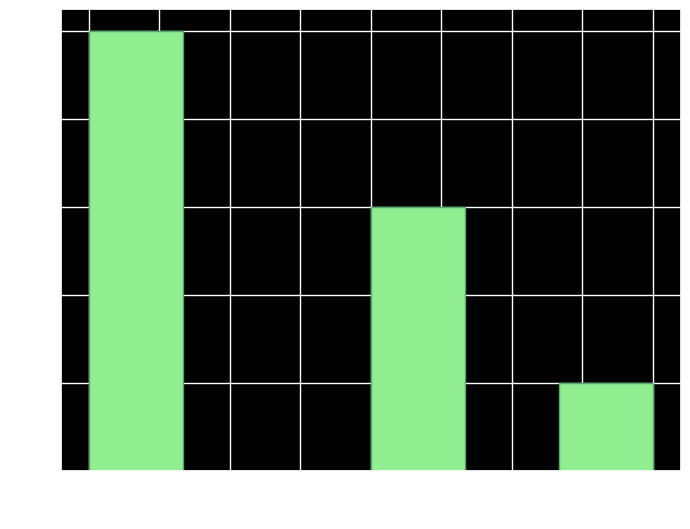

In [1455]:
#Ids = data_Athletes['ID']
Sports = data_Athletes['sport']
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
#create histogram
plt.hist(Sports,"auto",color='lightgreen',edgecolor="g",align='mid')

# Add x-axis and y-axis titles
plt.xlabel('X-axis : Sports')
plt.ylabel('Y-axis :Athletes')
# Display the plot
plt.show()

**57. get the first letter of last name of students using for loops and RegEX**

In [1458]:
list = data_Athletes.iloc[:] 
# Converting DataFrame to list using values property
last_name_list = list['Last Name'].tolist()

# Iterate over first 50 rows
for rows in last_name_list:
    #regex pattern used to extract last char of string.
   regex_result = re.search(r'^[A-za-z]{1}',rows)
   print("first letter ", regex_result ,"of athletes ", rows)

first letter  <re.Match object; span=(0, 1), match='M'> of athletes  Martinez
first letter  <re.Match object; span=(0, 1), match='R'> of athletes  Reynolds
first letter  <re.Match object; span=(0, 1), match='H'> of athletes  Harper
first letter  <re.Match object; span=(0, 1), match='S'> of athletes  Sanchez
first letter  <re.Match object; span=(0, 1), match='T'> of athletes  Thompson
first letter  <re.Match object; span=(0, 1), match='R'> of athletes  Rodriguez
first letter  <re.Match object; span=(0, 1), match='S'> of athletes  Simmons
first letter  <re.Match object; span=(0, 1), match='B'> of athletes  Bennett
first letter  <re.Match object; span=(0, 1), match='P'> of athletes  Price
first letter  <re.Match object; span=(0, 1), match='J'> of athletes  Jordan
first letter  <re.Match object; span=(0, 1), match='G'> of athletes  Griffin
first letter  <re.Match object; span=(0, 1), match='D'> of athletes  Dixon
first letter  <re.Match object; span=(0, 1), match='C'> of athletes  Carpente

**58. What is the average % difference in heart rate between warm up and GET for all athletes?**

In [1460]:
# Step 2 Calculate heart rate from HR for the creiteria dataset
data_Criteria['HR'] = 60 / (data_Criteria['RR'] / 1000)
#print(sheet_criteria.head())

HR_warm_up_data = data_Criteria[data_Criteria['phase']=='Warm Up']
HR_GET_data = data_Criteria[data_Criteria['phase']=='GET']
#print(GET_data)

# Calculate the average HR for phase - warmup & GET
average_HR_warm_up = HR_warm_up_data['HR'].mean()
average_HR_GET = HR_GET_data['HR'].mean()
#print("average HR GET",average_HR_GET)
#print("average HR warmup",average_HR_warm_up)

#Find the average % difference in HR
percentage_differnce = ((average_HR_GET - average_HR_warm_up)/average_HR_warm_up )*100
print(f"The heart rate during a GET could be {percentage_differnce:0.2f} % higher than during the warm-up.")


The heart rate during a GET could be 87.86 % higher than during the warm-up.


59. Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [1329]:

# find maximum value of athletes height
print(f"The tallest athletes's height is {maxHeight} \n {df1[['sport','VO2Max']].iloc[df1['Height'].idxmax()]}")


The tallest athletes's height is 191 
 sport       fencing
VO2Max    69.705657
Name: 2, dtype: object


In [ ]:
60.get the last letter of athletes last names using RegEX

In [1331]:
list_of_50 = sheet_Athletes.iloc[:50] 
# Converting DataFrame to list using values property
list = list_of_50['Last Name'].tolist()

# Iterate over first 50 rows
for rows in list:
    #regex pattern used to extract last char of string.
   regex_result = re.search(r'[A-za-z]{1}\Z',rows)
   print("last letter ", regex_result ,"of athletes ", rows)

last letter  <re.Match object; span=(7, 8), match='z'> of athletes  Martinez
last letter  <re.Match object; span=(7, 8), match='s'> of athletes  Reynolds
last letter  <re.Match object; span=(5, 6), match='r'> of athletes  Harper
last letter  <re.Match object; span=(6, 7), match='z'> of athletes  Sanchez
last letter  <re.Match object; span=(7, 8), match='n'> of athletes  Thompson
last letter  <re.Match object; span=(8, 9), match='z'> of athletes  Rodriguez
last letter  <re.Match object; span=(6, 7), match='s'> of athletes  Simmons
last letter  <re.Match object; span=(6, 7), match='t'> of athletes  Bennett
last letter  <re.Match object; span=(4, 5), match='e'> of athletes  Price
last letter  <re.Match object; span=(5, 6), match='n'> of athletes  Jordan
last letter  <re.Match object; span=(6, 7), match='n'> of athletes  Griffin
last letter  <re.Match object; span=(4, 5), match='n'> of athletes  Dixon
last letter  <re.Match object; span=(8, 9), match='r'> of athletes  Carpenter
last letter